In [1]:
from main import import_data, hist_keys, scatter_grid
import pandas as pd
import matplotlib.pyplot as plt

data = import_data()
data["events"]

EVENT_ID  SESSION_ID  SUCCESS   WORD           REGEX  \
0     5a8436502b0096000f8e4e54   188877828     True      a           a*|bb   
1     5a84366d2b0096000f8e4e66   188877828     True    aaa           a*|bb   
2     5a8436bb2b0096000f8e4e72   188877828     True      a             a|b   
3     5a8436bd2b0096000f8e4e74   188877828     True      b             a|b   
4     5a8436d32b0096000f8e4e7f   188877828     True     bb           a*|bb   
...                        ...         ...      ...    ...             ...   
2959  5b27b62365ef6900196f725a  2068864201     True  dadaa  (a|d)*ad(a|d)*   
2960  5b27b62765ef6900196f725d  2068864201     True  dcdcc  (c|d)*cd(c|d)*   
2961  5b27b62a65ef6900196f7260  2068864201     True     cd  (c|d)*cd(c|d)*   
2962  5b27b63565ef6900196f7266  2068864201     True  dcdcc  (c|d)*cd(c|d)*   
2963  5b2a73eebb450f0019e2953d  1654918098     True   dddd              d*   

              START            END  DURATION  PLAYERAREA   PLAYER  
0     1518614632626  1518614633892      1266           0  Anton A  
1     1518614660257  1518614663487      3230           0  Anton A  
2     1518614738986  1518614740888      1902           0  Anton A  
3     1518614742095  1518614743490      1395           0  Anton A  
4     1518614763324  1518614765057      1733           0  Anton A  
...             ...            ...       ...         ...      ...  
2959              1    5,2933E+016       856           1  Doris D  
2960              1    5,2933E+016       862           3  Doris D  
2961              1    5,2933E+016       661           3  Doris D  
2962              1    5,2933E+016       493           3  Doris D  
2963              1    5,2951E+016      1219           3  Doris D  

[2964 rows x 10 columns]

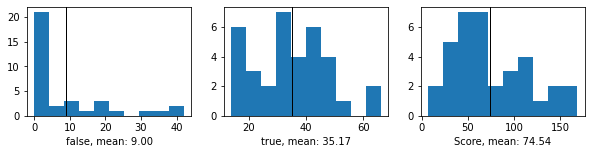

In [2]:
# Simple histograms of some potential success/failure metrics for each participant to get a feeling for value ranges/distribution
# distribution mean is annotated by the black vertical line
fig, a = hist_keys(data["participants"], ["false", "true", "Score"], mean=True, figsize=(10,2))
plt.savefig("plots/success_dists.png")

In [3]:
from player_data import calc_player_data
pdata, inds = calc_player_data()

In [4]:
import numpy as np
from filters import as_impulse_vector, gaussian_filter, staircase

p = pdata[(188877828, 'Anton A')]
v = as_impulse_vector(p)
x = np.arange(v.shape[0])

In [5]:
plt.plot(x, staircase(v))
plt.show()

In [6]:
#fig, a = plt.subplots(int(len(list(inds)) / 4), figsize=(20, 40))

plt.figure(figsize = (12,7))

for i in range(4):
    k = inds[-5 + i]
    sId, p = k # use last 4 participants
    vect = as_impulse_vector(pdata[k])
    x = np.arange(vect.shape[0])
    plt.plot(x, staircase(vect), label=p)

plt.legend()
plt.title("Group {0}".format(inds[-1][0]))
plt.xlabel("Time (in s)")
plt.ylabel("Total Points")
plt.savefig("plots/accumulated_scores.png")
"""
i = 0
for k in inds:
    sId, p = k
    vect = as_impulse_vector(pdata[k])
    x = np.arange(vect.shape[0])
    
    a[int(i / 4)].plot(x, staircase(vect), label=p)
    a[int(i / 4)].set(title="Group: {0}".format(sId))
    a[int(i / 4)].set(xlabel="Time (in s)")
    a[int(i / 4)].set(ylabel="Total points")
    a[int(i / 4)].legend()
    i = i + 1 
"""
plt.show()

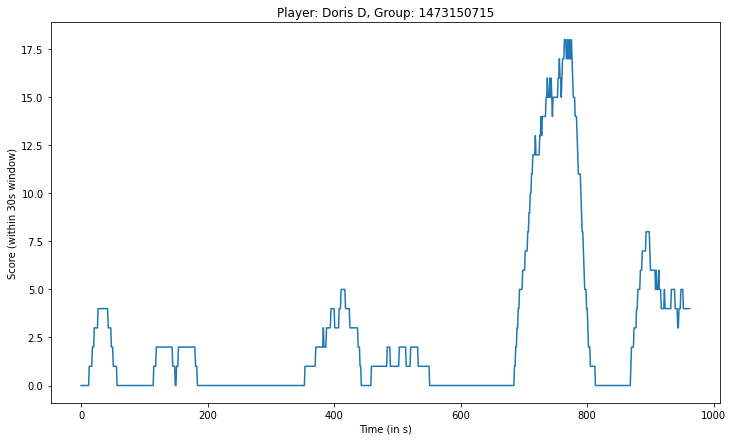

In [7]:
sId, k = inds[-1]
v = as_impulse_vector(pdata[inds[-1]])
f = np.ones(30)
sums = np.convolve(v, f, mode="same")
x = np.arange(sums.size)

plt.figure(figsize=(12,7))
plt.plot(x, sums)
plt.xlabel("Time (in s)")
plt.ylabel("Score (within 30s window)")
plt.title("Player: {0}, Group: {1}".format(k, sId))
plt.savefig("plots/rolling_sum.png")
plt.show()

In [15]:
from regex_data import regex_stats
regex_stats(pdata[(188877828, 'Anton A')])[["REGEX", "succ_ratio"]].values.tolist()

[['(a*|b)ab*ba', 0.4],
 ['(a|b)*ab(a|b)*', 0.6],
 ['(ab)*', 0.6666666666666666],
 ['(a|ab)*', 1.0],
 ['a*|bb', 1.0],
 ['a|b', 1.0]]